In [39]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import os

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
os.chdir('/home/jovyan/work/')

In [5]:
os_path = os.getcwd()

sh_path = '/data/19a.shp'

censo_gdf =  gpd.read_file(os_path + sh_path, na_values = ['*'])
print(censo_gdf.shape)
censo_gdf.head()

(2765, 6)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,1900100010021,19,001,0001,0021,"POLYGON ((2659616.600 1545244.086, 2659704.062..."
1,1900100010036,19,001,0001,0036,"POLYGON ((2660141.835 1544653.818, 2660161.176..."
2,1900100010055,19,001,0001,0055,"POLYGON ((2660414.500 1543978.139, 2660414.199..."
3,1900100010040,19,001,0001,0040,"POLYGON ((2660300.222 1545075.583, 2661109.051..."
4,1900200010230,19,002,0001,0230,"POLYGON ((2744964.210 1586383.575, 2744955.881..."


In [6]:
# Observamos 1 problema, existen 'Leading Zeros' en 4 columnas del objeto, por lo que al hacer merge con el csv
# nos daría un error. Mediante lstrip() eliminamos estos ceros y podemos hacer un merge normal

In [7]:
censo_gdf['CVE_ENT'] = censo_gdf['CVE_ENT'].apply(lambda x: int(x))
censo_gdf['CVE_MUN'] = censo_gdf['CVE_MUN'].apply(lambda x: int(x.lstrip('0')))
censo_gdf['CVE_LOC'] = censo_gdf['CVE_LOC'].apply(lambda x: int(x.lstrip('0')))
censo_gdf['CVE_AGEB'] = censo_gdf['CVE_AGEB'].apply(lambda x: x.lstrip('0'))
censo_gdf.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,1900100010021,19,1,1,21,"POLYGON ((2659616.600 1545244.086, 2659704.062..."
1,1900100010036,19,1,1,36,"POLYGON ((2660141.835 1544653.818, 2660161.176..."
2,1900100010055,19,1,1,55,"POLYGON ((2660414.500 1543978.139, 2660414.199..."
3,1900100010040,19,1,1,40,"POLYGON ((2660300.222 1545075.583, 2661109.051..."
4,1900200010230,19,2,1,230,"POLYGON ((2744964.210 1586383.575, 2744955.881..."


In [8]:
ageb_path = '/data/agebs_2021.csv'

df_ageb = pd.read_csv(os_path + ageb_path, encoding = 'iso-8859-1', na_values = ['*'])
print(df_ageb.shape)
df_ageb.head()

(2575, 229)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,19,Nuevo León,4,Allende,1,Total AGEB urbana,95,0,721,367.0,354.0,20.0,12.0,8.0,701.0,355.0,346.0,680.0,347.0,333.0,615.0,313.0,302.0,591.0,301.0,290.0,555.0,281.0,274.0,29.0,12.0,17.0,57.0,30.0,27.0,66.0,35.0,31.0,24.0,12.0,12.0,36.0,20.0,16.0,86.0,44.0,42.0,190.0,133.0,75.0,58.0,96.46,130.0,489.0,102.0,1.91,703.0,361.0,342.0,18.0,6.0,12.0,675.0,346.0,329.0,5.0,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,15.0,9.0,5.0,7.0,3.0,9.0,5.0,33.0,7.0,22.0,5.0,10.0,8.0,8.0,5.0,671.0,15.0,4.0,11.0,15.0,9.0,6.0,4.0,0.0,4.0,19.0,10.0,9.0,20.0,7.0,13.0,4.0,3.0,NaN,8.0,4.0,4.0,14.0,8.0,6.0,64.0,29.0,35.0,89.0,47.0,42.0,25.0,10.0,15.0,181.0,89.0,92.0,193.0,100.0,93.0,9.09,9.16,9.02,324.0,129.0,195.0,290.0,184.0,106.0,324.0,129.0,195.0,0.0,0.0,0.0,78.0,643.0,523.0,17.0,5.0,0.0,36.0,NaN,34.0,38.0,203.0,348.0,64.0,616.0,76.0,0.0,29.0,252.0,62.0,190.0,721.0,148.0,573.0,320,252.0,305.0,237.0,252.0,43.0,25.0,721.0,2.86,0.62,252.0,0.0,46.0,206.0,5.0,10.0,237.0,252.0,0.0,252.0,252.0,0.0,27.0,9.0,252.0,0.0,252.0,0.0,252.0,0.0,252.0,62.0,0.0,252.0,240.0,195.0,189.0,52.0,78.0,179.0,248.0,138.0,156.0,228.0,156.0,138.0,76.0,39.0,NaN,10.0,74.0,0.0
1,19,Nuevo León,4,Allende,1,Total AGEB urbana,112,0,624,258.0,366.0,14.0,6.0,8.0,610.0,252.0,358.0,596.0,249.0,347.0,557.0,229.0,328.0,544.0,222.0,322.0,508.0,212.0,296.0,23.0,8.0,15.0,30.0,15.0,15.0,36.0,19.0,17.0,13.0,7.0,6.0,36.0,10.0,26.0,83.0,33.0,50.0,138.0,101.0,51.0,50.0,141.86,80.0,472.0,72.0,1.85,505.0,228.0,277.0,109.0,24.0,85.0,552.0,239.0,313.0,44.0,10.0,34.0,10.0,5.0,5.0,NaN,NaN,0.0,9.0,4.0,5.0,10.0,NaN,9.0,9.0,0.0,0.0,0.0,9.0,3.0,7.0,NaN,3.0,NaN,NaN,35.0,22.0,16.0,13.0,17.0,10.0,10.0,5.0,577.0,16.0,4.0,12.0,8.0,4.0,4.0,0.0,0.0,0.0,28.0,8.0,20.0,29.0,8.0,21.0,0.0,0.0,0.0,6.0,5.0,NaN,

In [9]:
gdf = pd.merge(censo_gdf, df_ageb, left_on = ['CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB'],
               right_on = ['ENTIDAD', 'MUN', 'LOC', 'AGEB']).drop(['CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB'], axis = 1)

print(gdf.shape)
gdf.head()

(2451, 231)


,CVEGEO,geometry,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1900400010381,"POLYGON ((2700362.599 1471030.758, 2700264.311...",19,Nuevo León,4,Allende,1,Total AGEB urbana,381,0,1132,582.0,550.0,56.0,29.0,27.0,1076.0,553.0,523.0,1041.0,534.0,507.0,917.0,473.0,444.0,865.0,448.0,417.0,809.0,415.0,394.0,55.0,31.0,24.0,104.0,49.0,55.0,131.0,63.0,68.0,52.0,25.0,27.0,56.0,33.0,23.0,153.0,83.0,70.0,341.0,80.0,36.0,44.0,94.50,267.0,826.0,39.0,1.72,1060.0,546.0,514.0,70.0,35.0,35.0,1031.0,529.0,502.0,9.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,18.0,17.0,19.0,6.0,7.0,8.0,NaN,6.0,7.0,40.0,12.0,27.0,3.0,11.0,4.0,5.0,22.0,1055.0,27.0,14.0,13.0,3.0,NaN,NaN,9.0,3.0,6.0,36.0,21.0,15.0,33.0,18.0,15.0,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN,NaN,28.0,14.0,14.0,123.0,57.0,66.0,18.0,6.0,12.0,301.0,158.0,143.0,341.0,180.0,161.0,10.03,10.19,9.87,591.0,233.0,358.0,324.0,238.0,86.0,590.0,233.0,357.0,NaN,0.0,NaN,125.0,1007.0,843.0,65.0,7.0,NaN,77.0,0.0,24.0,9.0,253.0,587.0,77.0,942.0,132.0,NaN,56.0,344.0,137.0,207.0,1132.0,434.0,698.0,382,344.0,368.0,330.0,344.0,28.0,10.0,1132.0,3.29,0.75,343.0,NaN,44.0,300.0,0.0,5.0,339.0,344.0,0.0,344.0,339.0,0.0,112.0,5.0,343.0,0.0,343.0,0.0,343.0,0.0,343.0,35.0,0.0,341.0,339.0,273.0,302.0,44.0,57.0,196.0,334.0,216.0,199.0,330.0,255.0,247.0,104.0,70.0,6.0,7.0,62.0,0.0
1,1900400010220,"POLYGON ((2697826.789 1472885.791, 2697883.079...",19,Nuevo León,4,Allende,1,Total AGEB urbana,220,0,1010,511.0,499.0,33.0,18.0,15.0,977.0,493.0,484.0,951.0,483.0,468.0,856.0,434.0,422.0,832.0,427.0,405.0,778.0,402.0,376.0,38.0,15.0,23.0,83.0,44.0,39.0,79.0,36.0,43.0,24.0,7.0,17.0,54.0,25.0,29.0,105.0,55.0,50.0,239.0,244.0,143.0,101.0,97.65,178.0,637.0,195.0,2.30,928.0,465.0,463.0,79.0,43.0,36.0,917.0,466.0,451.0,31.0,16.0,15.0,5.0,NaN,3.0,0.0,0.0,0.0,5.0,NaN,3.0,5.0,0.0,5.0,

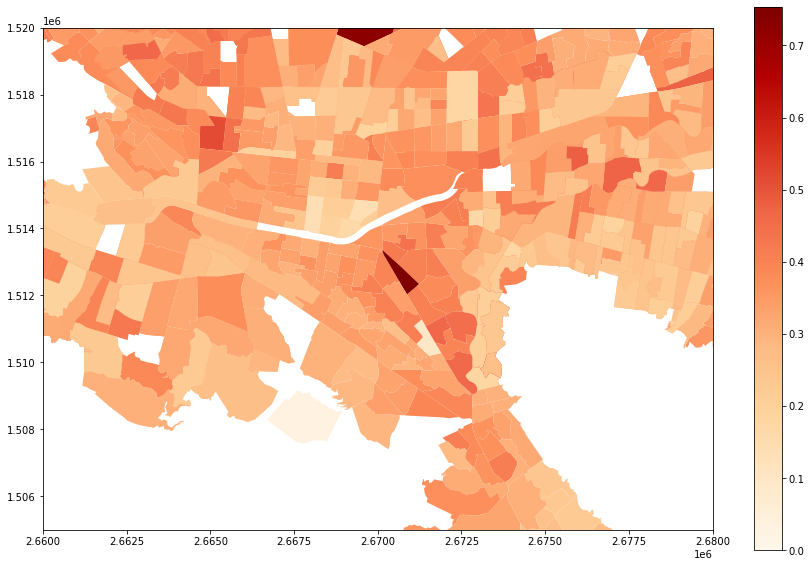

In [108]:
hom = gdf.loc[:, ['geometry','PE_INAC','POBTOT']]

hom.loc[:, 'composition'] = (hom.loc[:, 'PE_INAC'] / hom.loc[:, 'POBTOT'])

hom.plot(column = 'composition',
         cmap = 'OrRd', 
         figsize=(15,10),
         legend = True)

plt.xlim(2.66e6, 2.68e6)
plt.ylim(1.505e6, 1.52e6)
plt.show();

In [43]:
from segregation.spatial import AbsoluteConcentration

cities = []
abs_index = []

for city in set(gdf['NOM_MUN']):
    
    city_gdf = gdf[gdf['NOM_MUN']==city].fillna(0)
    index = AbsoluteConcentration(city_gdf, 'POBMAS', 'POBTOT')
    
    cities.append(city)
    abs_index.append(round(index.statistic, 4))
    
df_index = pd.DataFrame.from_dict({'city': cities, 'absolute_concentration': abs_index})

df_index.sort_values('absolute_concentration', ascending = False).head(10)

,city,absolute_concentration
34,Bustamante,0.6502
6,Cerralvo,0.5963
22,Doctor Arroyo,0.5596
9,Lampazos de Naranjo,0.5572
1,Villaldama,0.5541
7,Hidalgo,0.5366
33,Aramberri,0.5128
2,Salinas Victoria,0.5091
21,China,0.5086
18,Monterrey,0.5064


<AxesSubplot:>

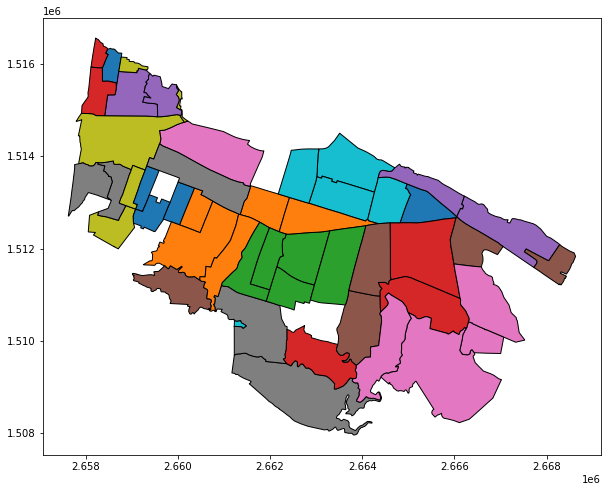

In [63]:
gdf_spgg = gdf[gdf['NOM_MUN']=='San Pedro Garza García']

gdf_spgg.plot(column = 'AGEB', edgecolor='k', figsize = (10, 10))